In [2]:
import pandas as pd
from vnstock import *
from datetime import datetime
import plotly.express as px
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df = df.fillna(0)
df.head()

Date   ACB    MWG    MSN    BID    VRE    POW    PLX    HPG    VNM  \
0  2020-01-02  9460  37730  46160  32369  34350  11352  48590  10930  81400   
1  2020-01-03  9460  37170  46570  32229  34600  11161  49100  11000  81660   
2  2020-01-06  9260  36990  45830  31610  33650  10827  49280  10930  81040   
3  2020-01-07  9260  37270  46000  32229  33950  10731  48590  10790  81800   
4  2020-01-08  9090  36370  45350  32509  32700  10254  47910  10680  82000   

   ...      GVR     SAB      BCM   MBB    GAS  SSB     SHB   SSI    STB   VPB  
0  ...  10150.0  100180  28160.0  9680  68440  0.0  2990.0  8740  10200  7250  
1  ...  10500.0  100440  27880.0  9700  68590  0.0  2900.0  8670  10200  7200  
2  ...  10320.0  100080  27590.0  9560  70760  0.0  2860.0  8640  10050  7030  
3  ...  10050.0  100180  26830.0  9580  70250  0.0  2860.0  8670  10150  7180  
4  ...   9700.0   99810  26640.0  9450  70180  0.0  2860.0  8430   9980  7090  

[5 rows x 31 columns]

In [4]:
start = '2020-01-01'
now = datetime.now() - timedelta(days=1)
day = now.strftime("%d/%m/%Y")
now = now.strftime("%Y-%m-%d")

In [5]:
index_df = stock_historical_data("VNINDEX", start, now, "1D", "index", source='TCBS')
index_df = index_df[['time', 'close']].rename(columns={"time": "Date", "close": 'VNINDEX'})
index_df.drop_duplicates(subset = ['Date'], keep= 'last', inplace= True)
df = df.merge(index_df, how = 'left', on = 'Date')
df

Time range is 1535 days. Looping through 5 requests


Date    ACB    MWG    MSN    BID    VRE    POW    PLX    HPG  \
0     2020-01-02   9460  37730  46160  32369  34350  11352  48590  10930   
1     2020-01-03   9460  37170  46570  32229  34600  11161  49100  11000   
2     2020-01-06   9260  36990  45830  31610  33650  10827  49280  10930   
3     2020-01-07   9260  37270  46000  32229  33950  10731  48590  10790   
4     2020-01-08   9090  36370  45350  32509  32700  10254  47910  10680   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
1039  2024-03-08  27050  47750  78500  51100  25400  11700  36800  30300   
1040  2024-03-11  26750  46400  77500  50500  24500  11600  35950  29900   
1041  2024-03-12  26750  46750  78700  52000  25200  11500  36350  30200   
1042  2024-03-13  27650  48550  80900  52600  25900  11600  37100  30800   
1043  2024-03-14  27250  47250  78900  51700  25900  11600  37350  30350   

        VNM  ...     SAB      BCM    MBB    GAS      SSB      SHB    SSI  \
0     81400  ...  100180  28160.0   9680  68440      0.0   2990.0   8740   
1     81660  ...  100440  27880.0   9700  68590      0.0   2900.0   8670   
2     81040  ...  100080  27590.0   9560  70760      0.0   2860.0   8640   
3     81800  ...  100180  26830.0   9580  70250      0.0   2860.0   8670   
4     82000  ...   99810  26640.0   9450  70180      0.0   2860.0   8430   
...     ...  ...     ...      ...    ...    ...      ...      ...    ...   
1039  69110  ...   60000  69300.0  23600  79500  22700.0  11700.0  36800   
1040  69400  ...   59300  67100.0  22950  77800  22550.0  11400.0  36350   
1041  69110  ...   59100  67900.0  23100  77900  22550.0  11300.0  36300   
1042  69900  ...   59600  69200.0  23850  79000  22600.0  11550.0  37950   
1043  69600  ...   58700  67900.0  23450  81000  22600.0  11450.0  37850   

        STB    VPB  VNINDEX  
0     10200   7250   966.67  
1     10200   7200   965.14  
2     10050   7030   955.79  
3     10150   7180   958.88  
4      9980   7090   948.98  
...     ...    ...      ...  
1039  30650  19000  1247.35  
1040  30200  18550  1235.49  
1041  30250  18550  1245.00  
1042  30850  19050  1270.51  
1043  30450  18800  1264.26  

[1044 rows x 32 columns]

In [6]:
def daily_return(df):
    df_daily_return = df.copy()
    for i in df.columns[1:]:
        for j in range(1, len(df)):
            if df[i][j-1] == 0:
                continue
            df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
        df_daily_return[i][0] = 0
    return df_daily_return

In [7]:
stocks_daily_return = daily_return(df)
stocks_daily_return

/tmp/ipykernel_797/1826102477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
/tmp/ipykernel_797/1826102477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
/tmp/ipykernel_797/1826102477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) *

Date       ACB       MWG       MSN       BID       VRE       POW  \
0     2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     2020-01-03  0.000000 -1.484230  0.888215 -0.432513  0.727802 -1.682523   
2     2020-01-06 -2.114165 -0.484262 -1.589006 -1.920630 -2.745665 -2.992563   
3     2020-01-07  0.000000  0.756961  0.370936  1.958241  0.891530 -0.886672   
4     2020-01-08 -1.835853 -2.414811 -1.413043  0.868783 -3.681885 -4.445066   
...          ...       ...       ...       ...       ...       ...       ...   
1039  2024-03-08 -1.636364 -2.551020 -2.846535 -4.127580 -2.307692 -1.265823   
1040  2024-03-11 -1.109057 -2.827225 -1.273885 -1.174168 -3.543307 -0.854701   
1041  2024-03-12  0.000000  0.754310  1.548387  2.970297  2.857143 -0.862069   
1042  2024-03-13  3.364486  3.850267  2.795426  1.153846  2.777778  0.869565   
1043  2024-03-14 -1.446655 -2.677652 -2.472188 -1.711027  0.000000  0.000000   

           PLX       HPG       VNM  ...       SAB       BCM       MBB  \
0     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1     1.049599  0.640439  0.319410  ...  0.259533 -0.994318  0.206612   
2     0.366599 -0.636364 -0.759246  ... -0.358423 -1.040172 -1.443299   
3    -1.400162 -1.280878  0.937808  ...  0.099920 -2.754621  0.209205   
4    -1.399465 -1.019462  0.244499  ... -0.369335 -0.708163 -1.356994   
...        ...       ...       ...  ...       ...       ...       ...   
1039 -1.866667 -2.258065 -2.771525  ... -0.990099  0.434783 -3.278689   
1040 -2.309783 -1.320132  0.419621  ... -1.166667 -3.174603 -2.754237   
1041  1.112656  1.003344 -0.417867  ... -0.337268  1.192250  0.653595   
1042  2.063274  1.986755  1.143105  ...  0.846024  1.914580  3.246753   
1043  0.673854 -1.461039 -0.429185  ... -1.510067 -1.878613 -1.677149   

           GAS       SSB       SHB       SSI       STB       VPB   VNINDEX  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.219170  0.000000 -3.010033 -0.800915  0.000000 -0.689655 -0.158275  
2     3.163726  0.000000 -1.379310 -0.346021 -1.470588 -2.361111 -0.968771  
3    -0.720746  0.000000  0.000000  0.347222  0.995025  2.133713  0.323293  
4    -0.099644  0.000000  0.000000 -2.768166 -1.674877 -1.253482 -1.032455  
...        ...       ...       ...       ...       ...       ...       ...  
1039 -1.119403 -0.219780 -1.680672 -2.387268 -2.076677 -2.313625 -1.664223  
1040 -2.138365 -0.660793 -2.564103 -1.222826 -1.468189 -2.368421 -0.950816  
1041  0.128535  0.000000 -0.877193 -0.137552  0.165563  0.000000  0.769735  
1042  1.412067  0.221729  2.212389  4.545455  1.983471  2.695418  2.048996  
1043  2.531646  0.000000 -0.865801 -0.263505 -1.296596 -1.312336 -0.491928  

[1044 rows x 32 columns]

In [9]:
rm = stocks_daily_return['VNINDEX'].mean() * 252

In [12]:
rf = 2,24 / 365
beta = {}
alpha = {}

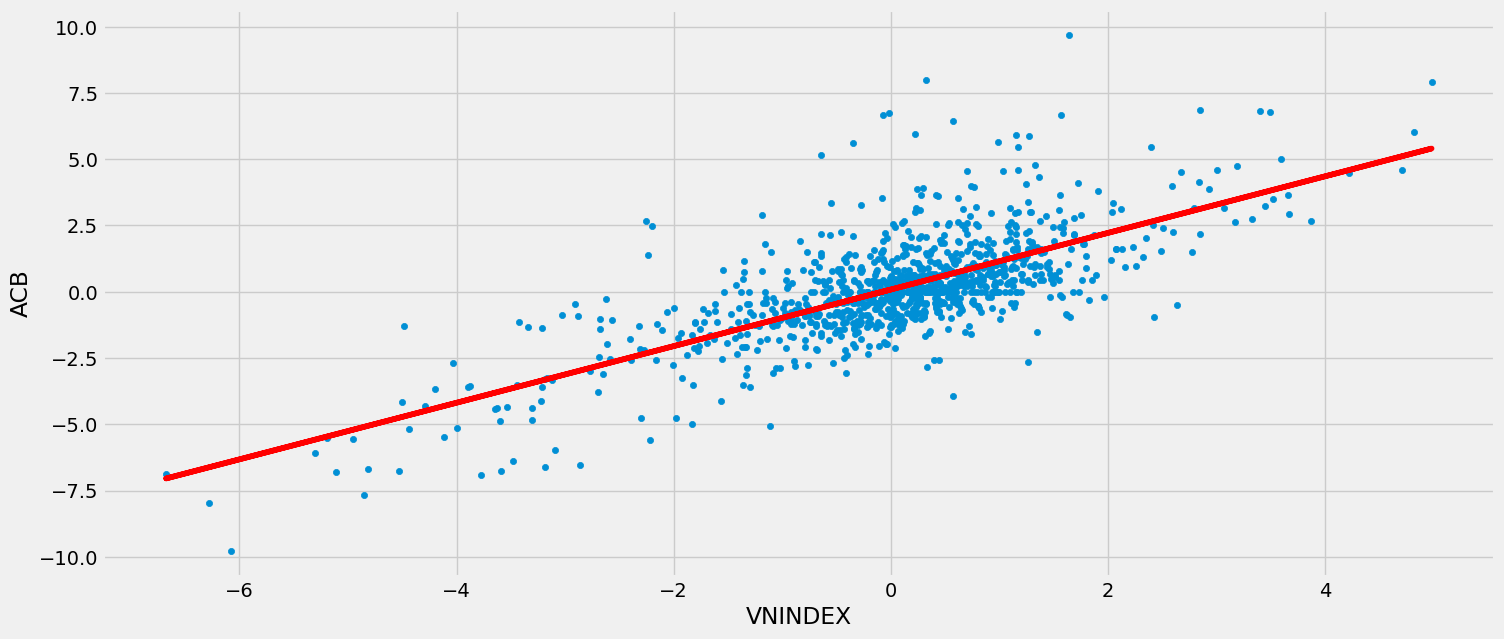

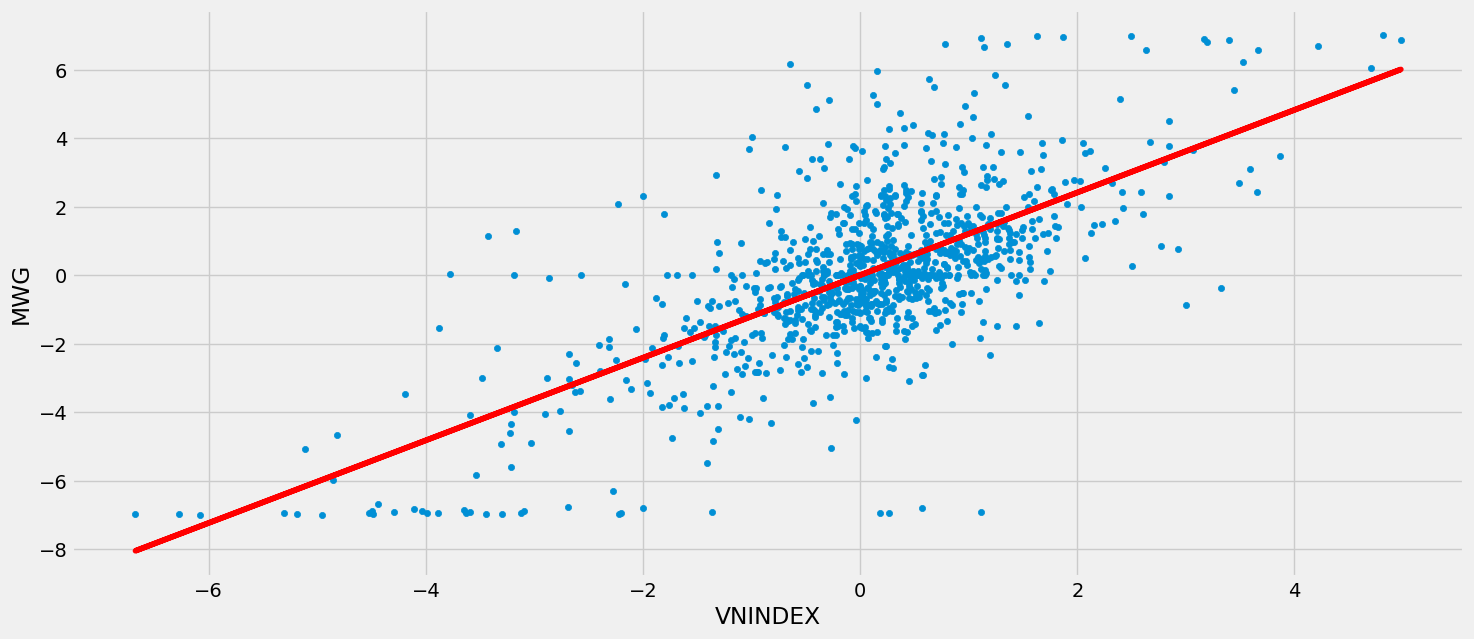

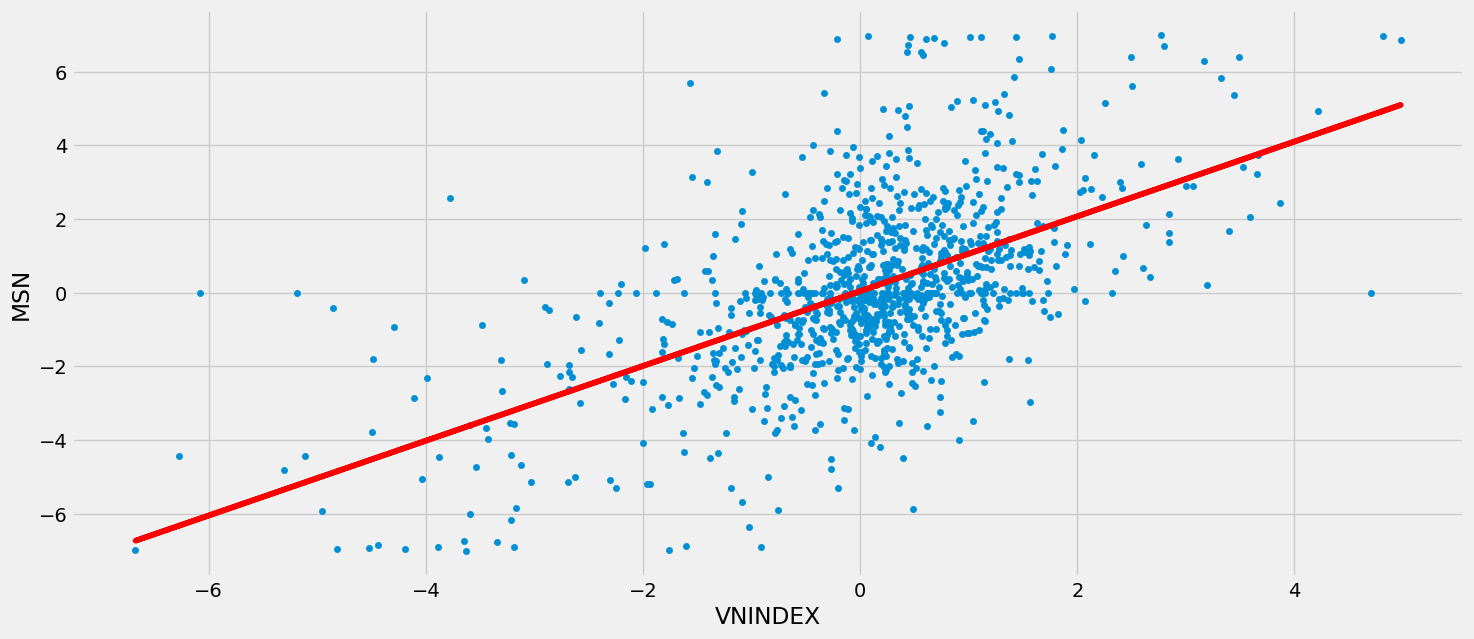

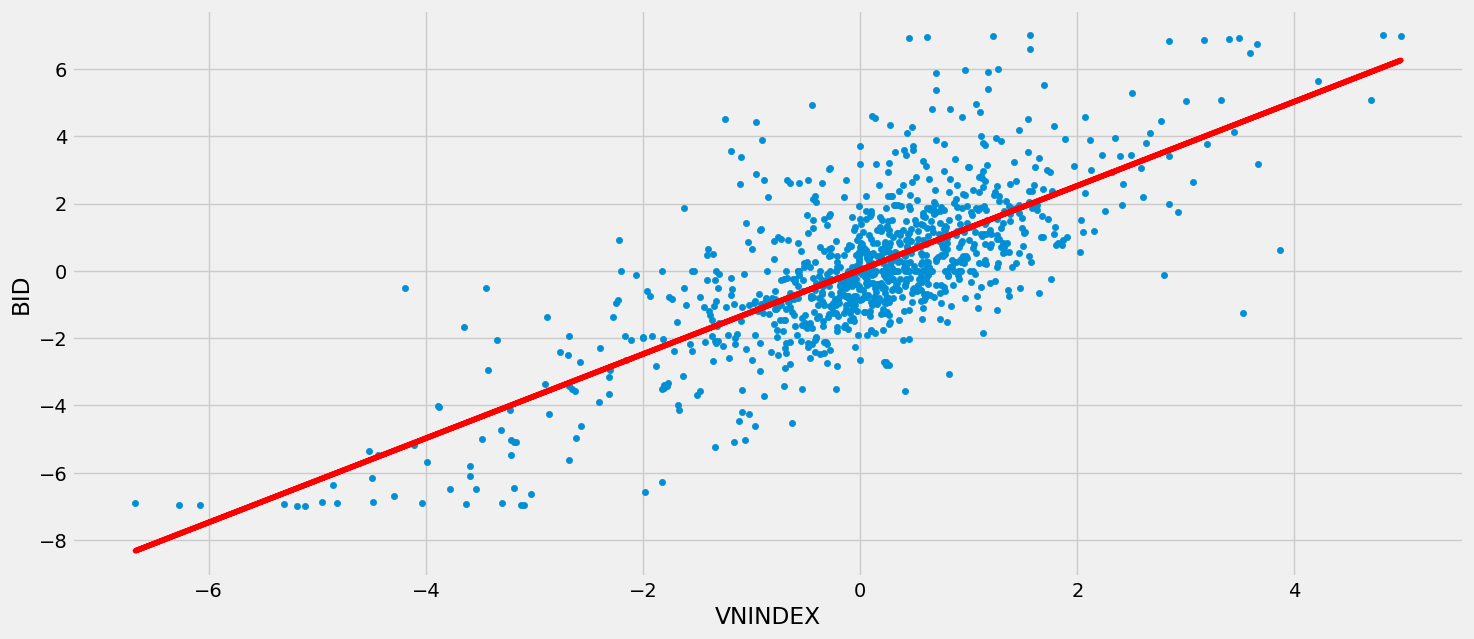

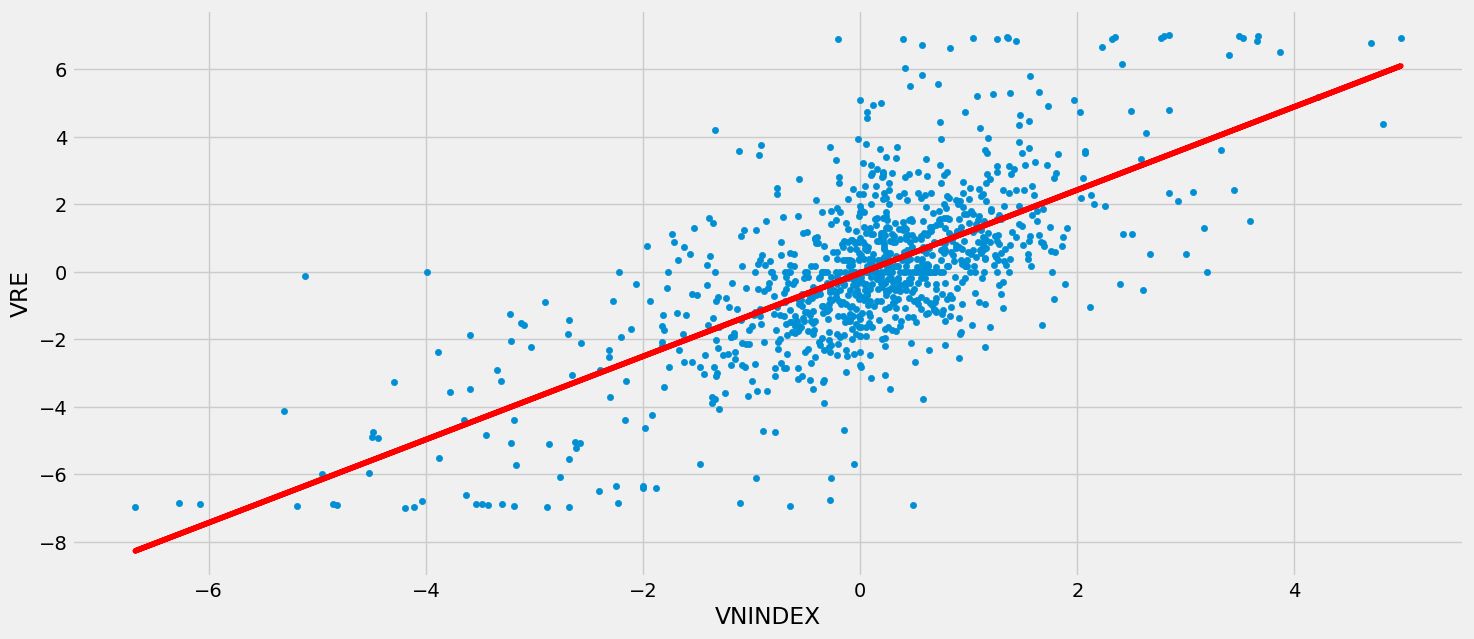

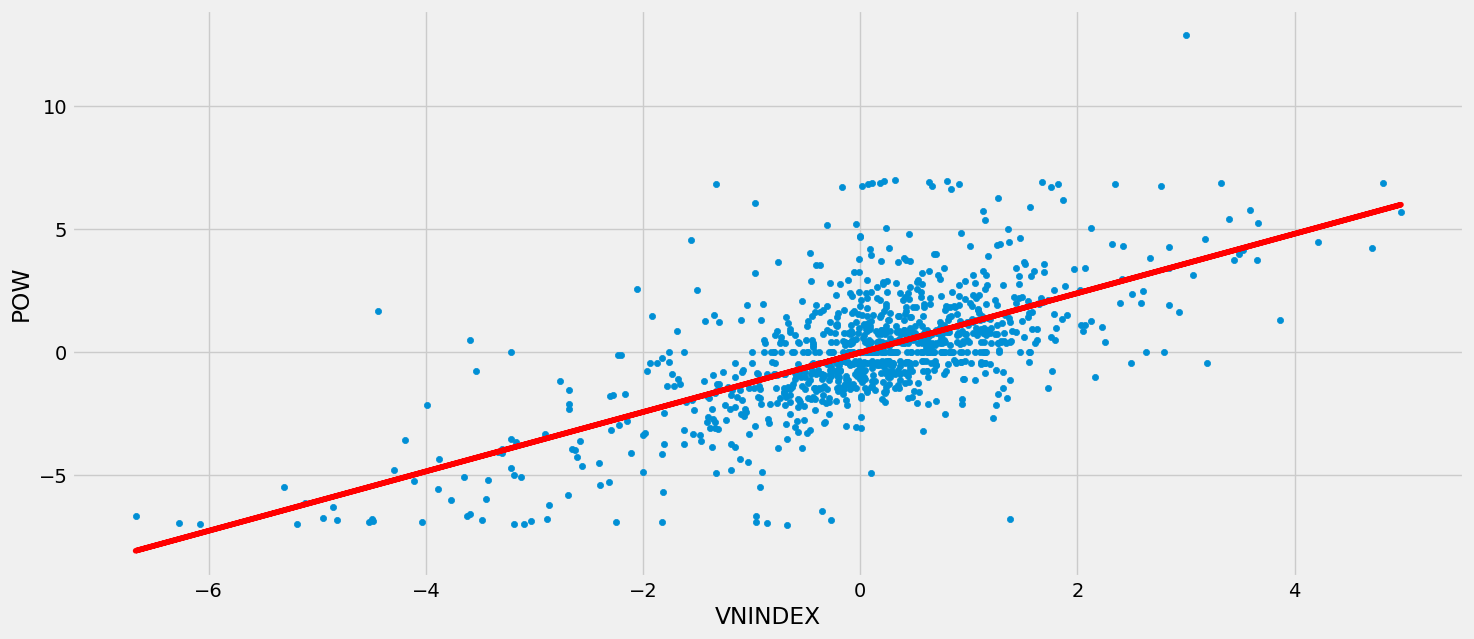

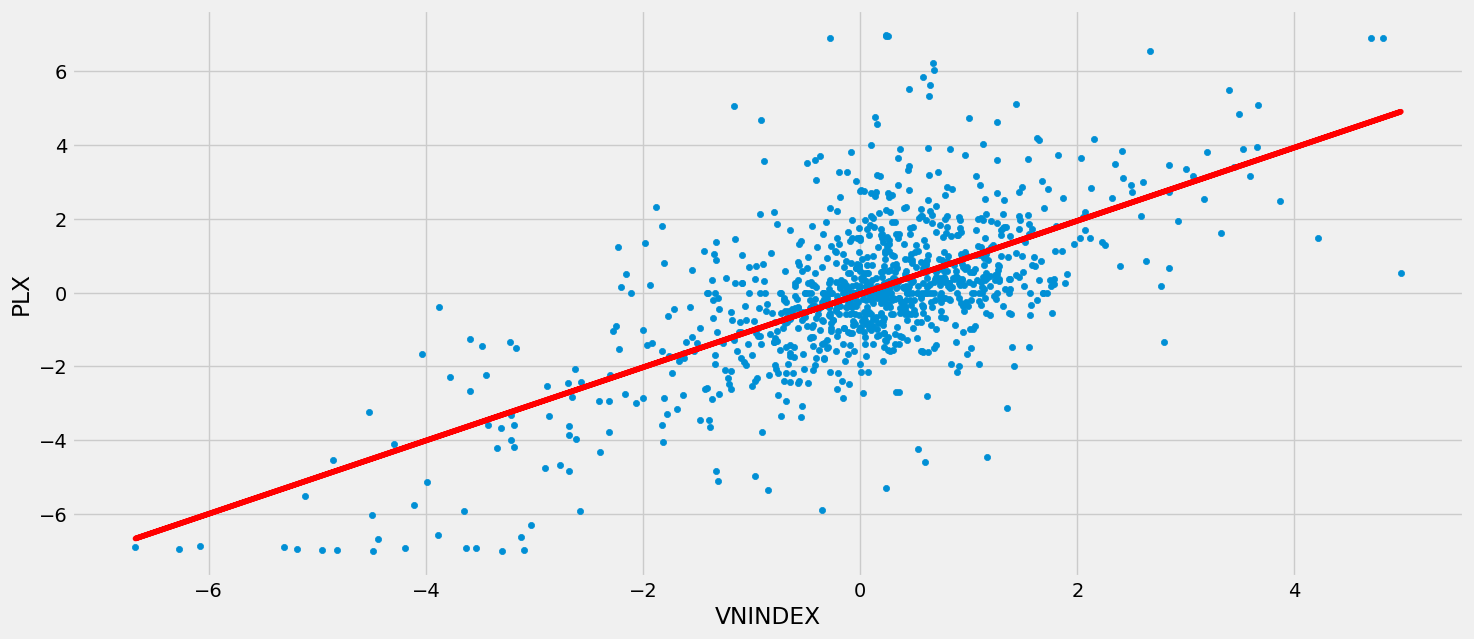

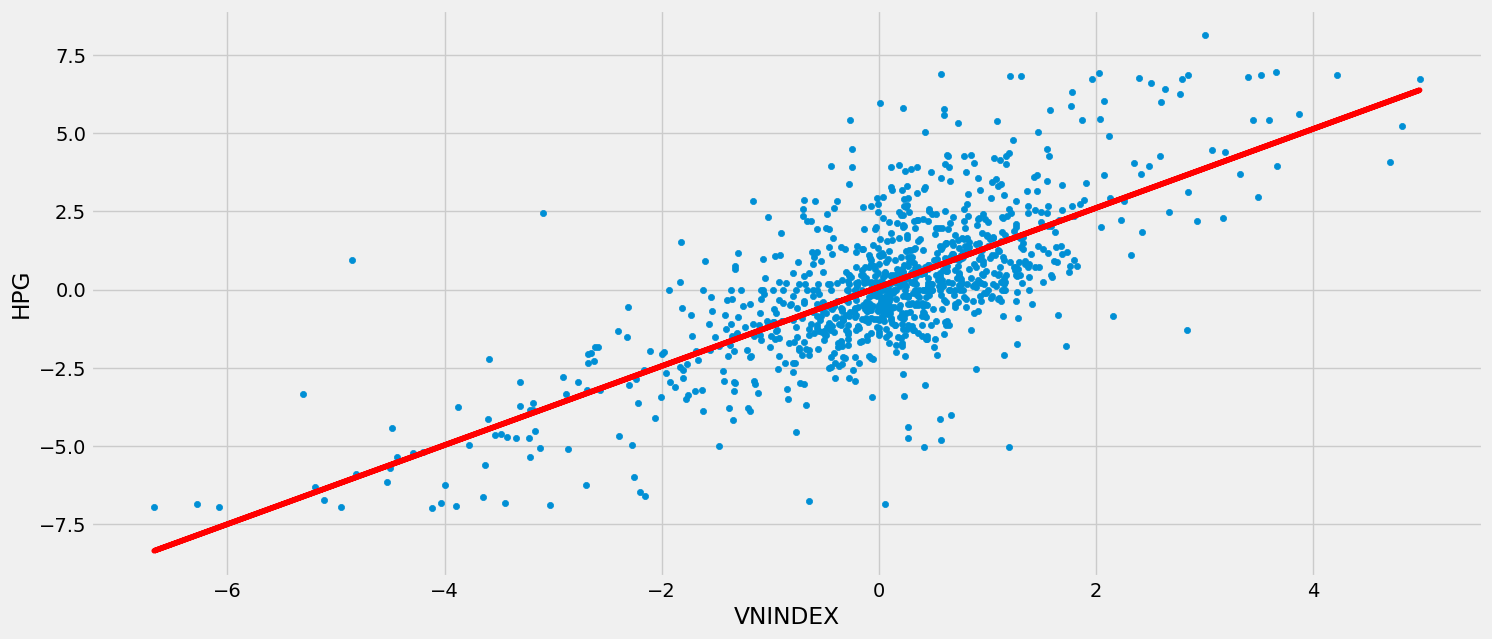

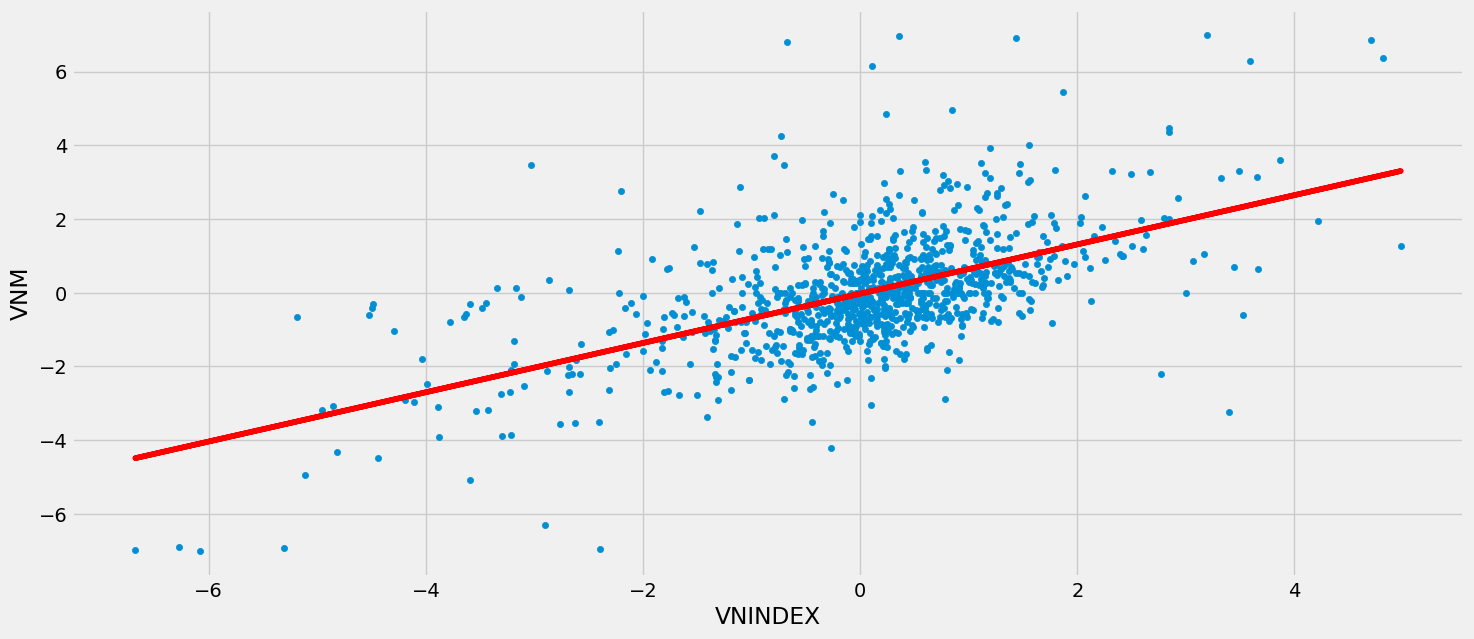

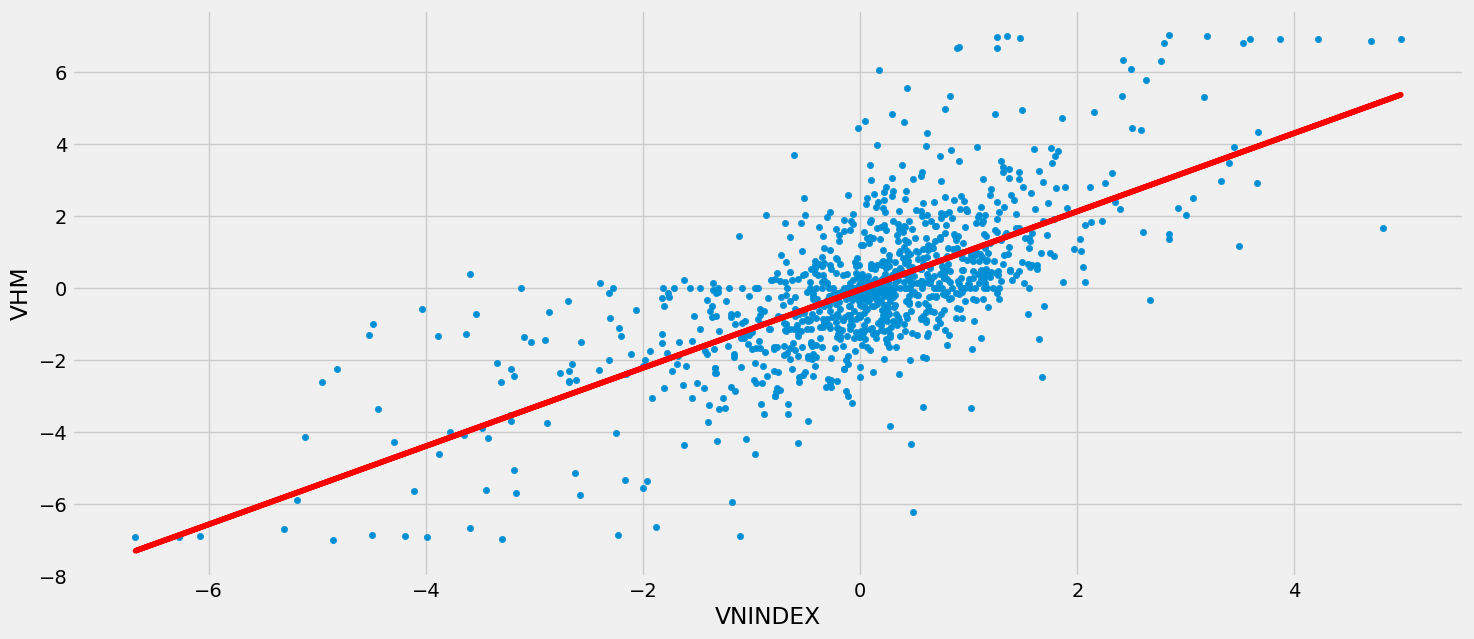

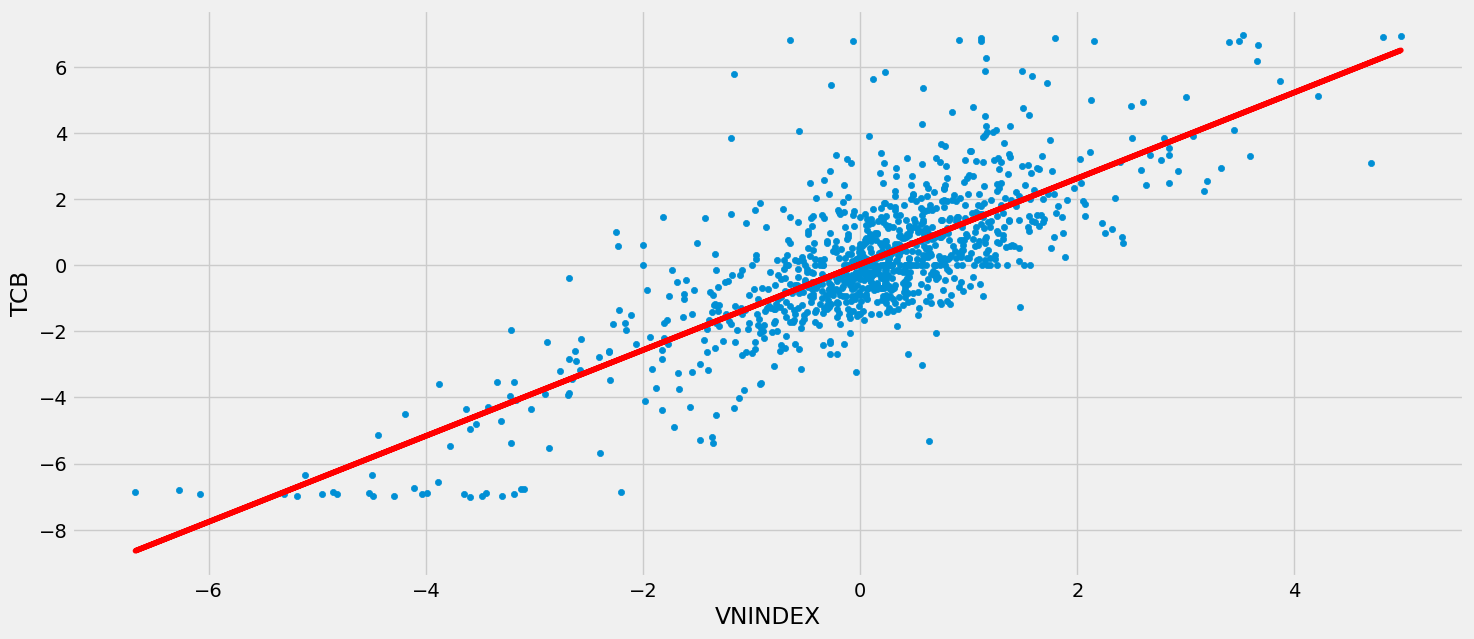

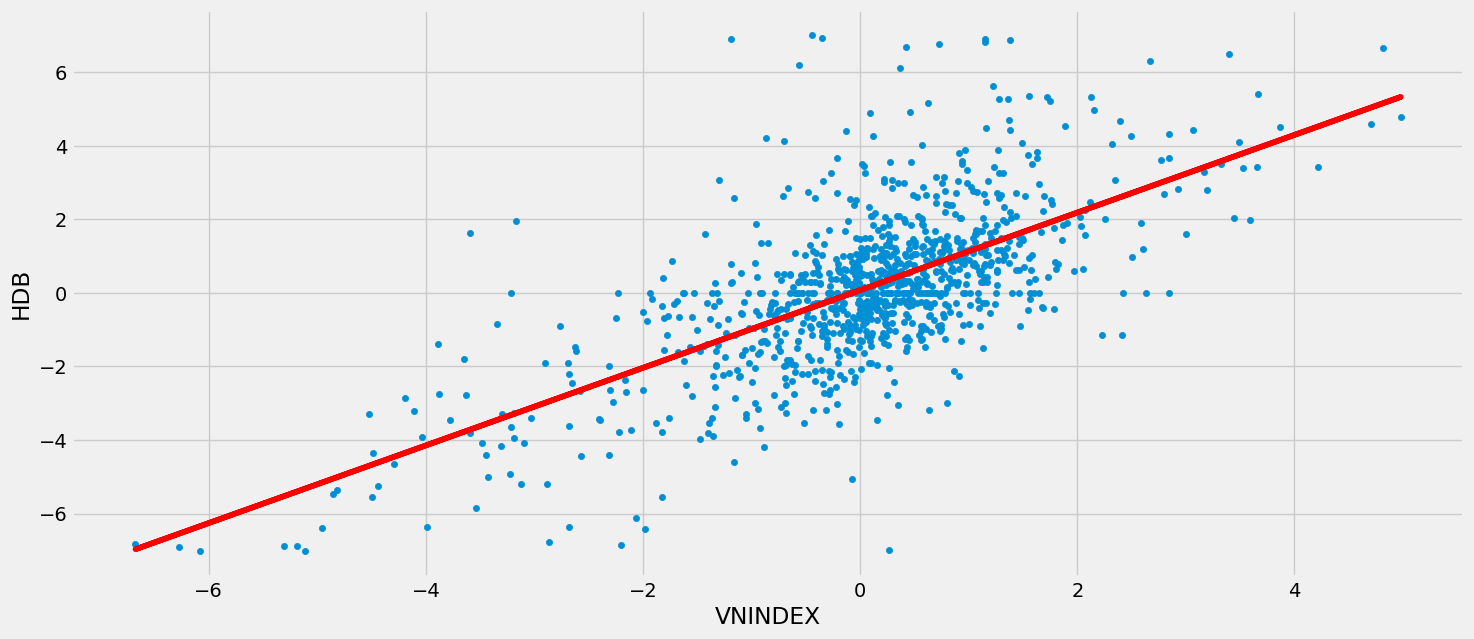

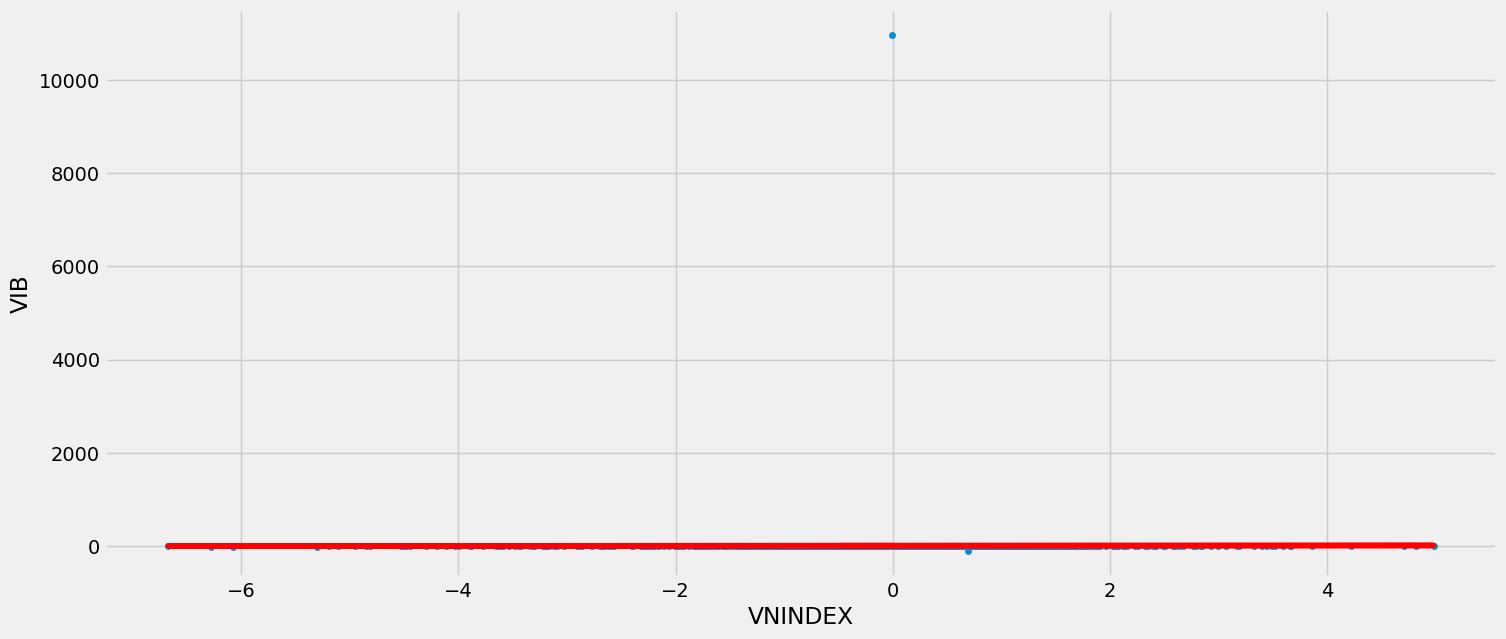

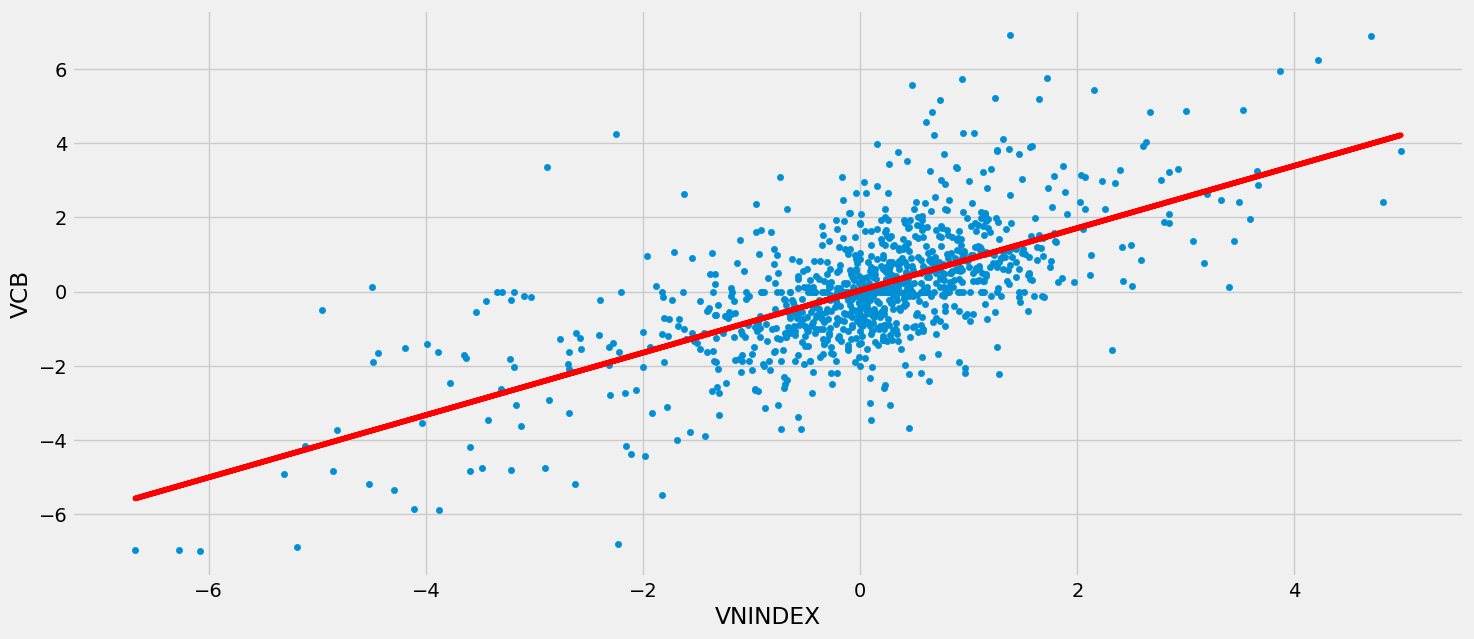

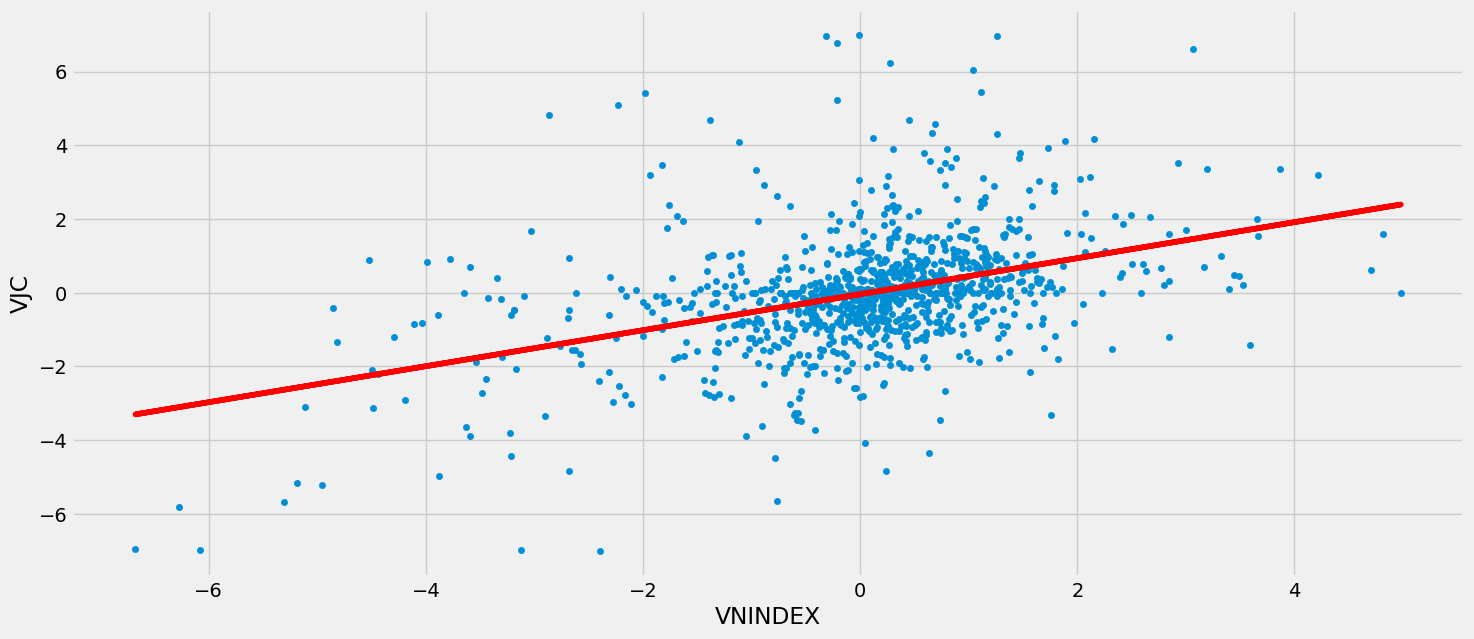

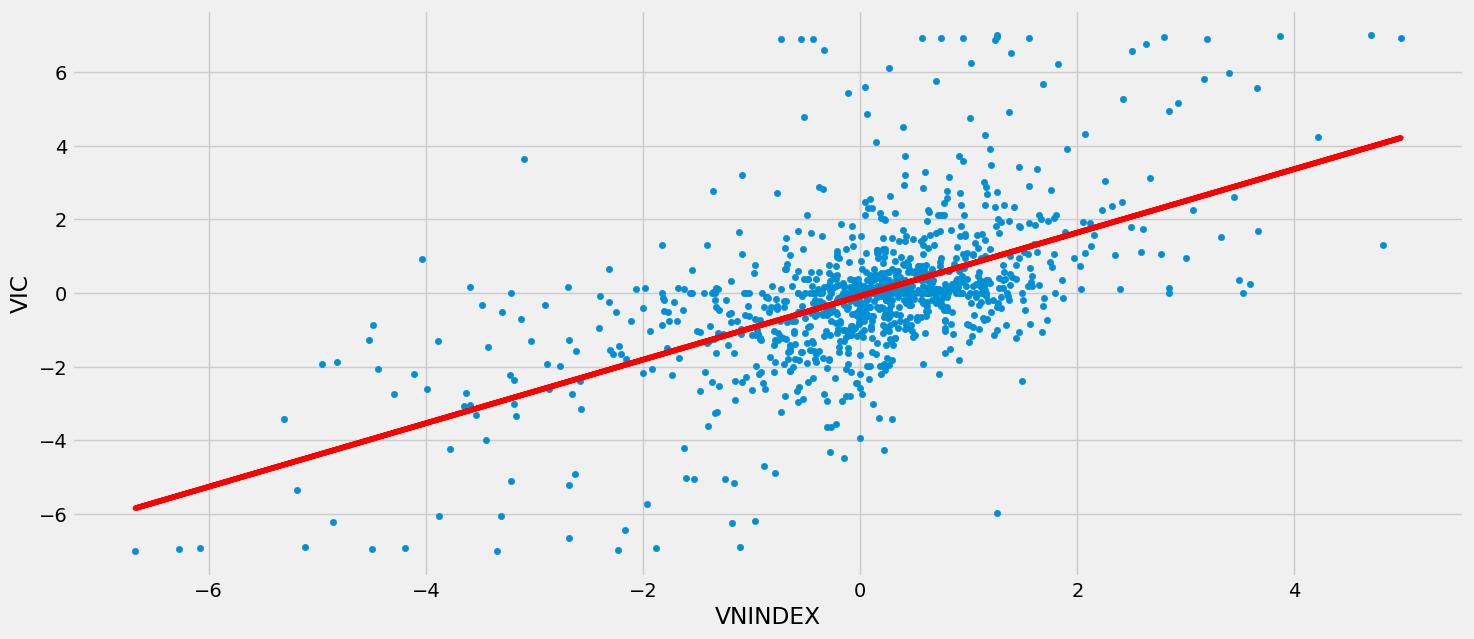

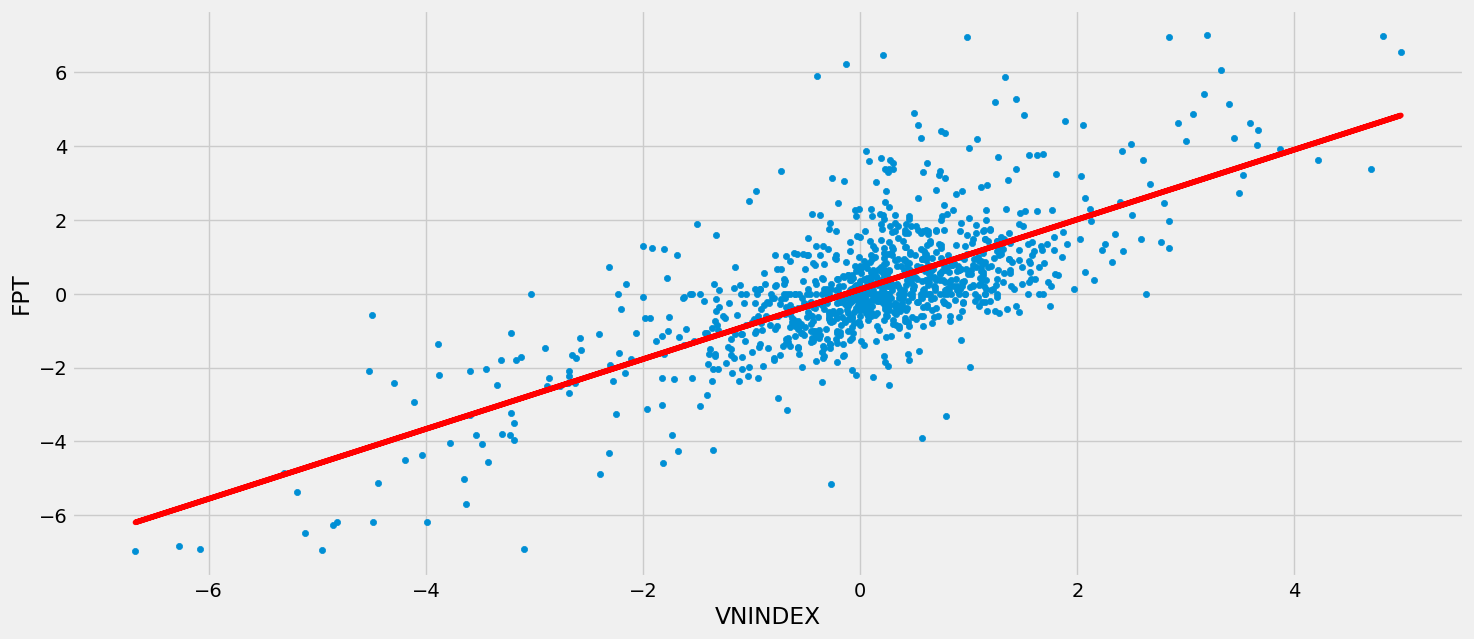

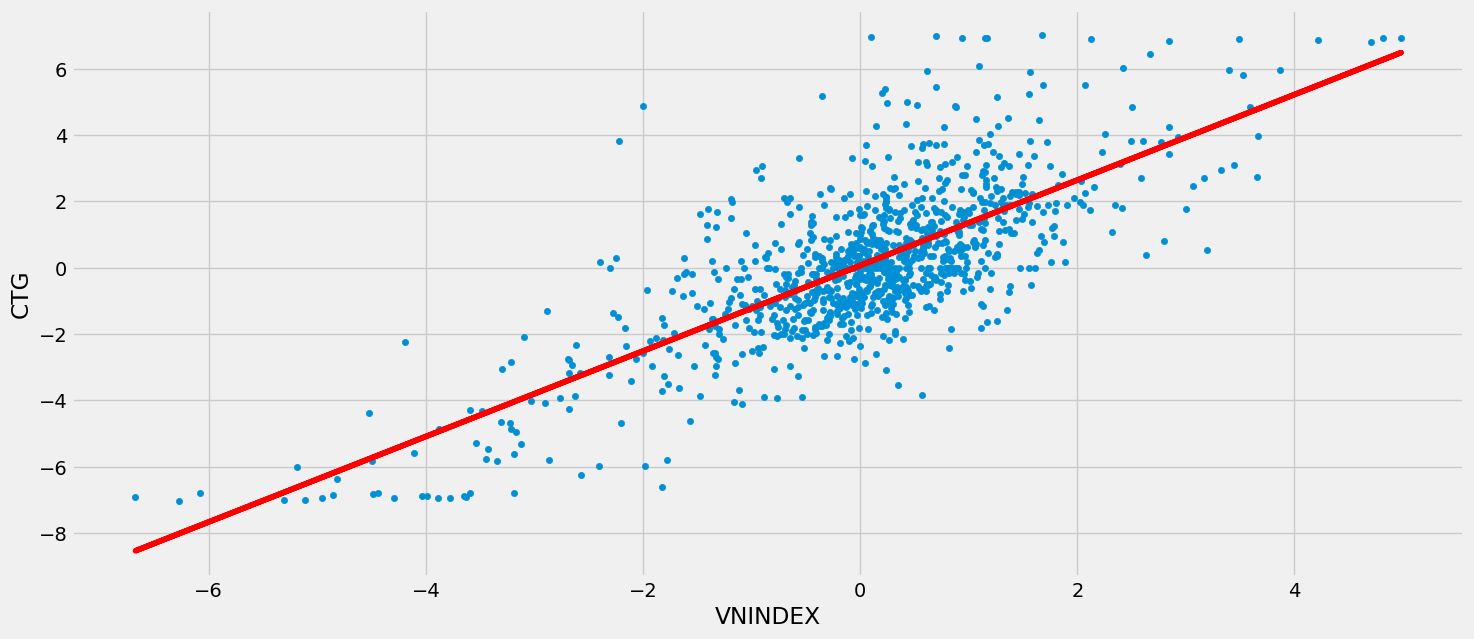

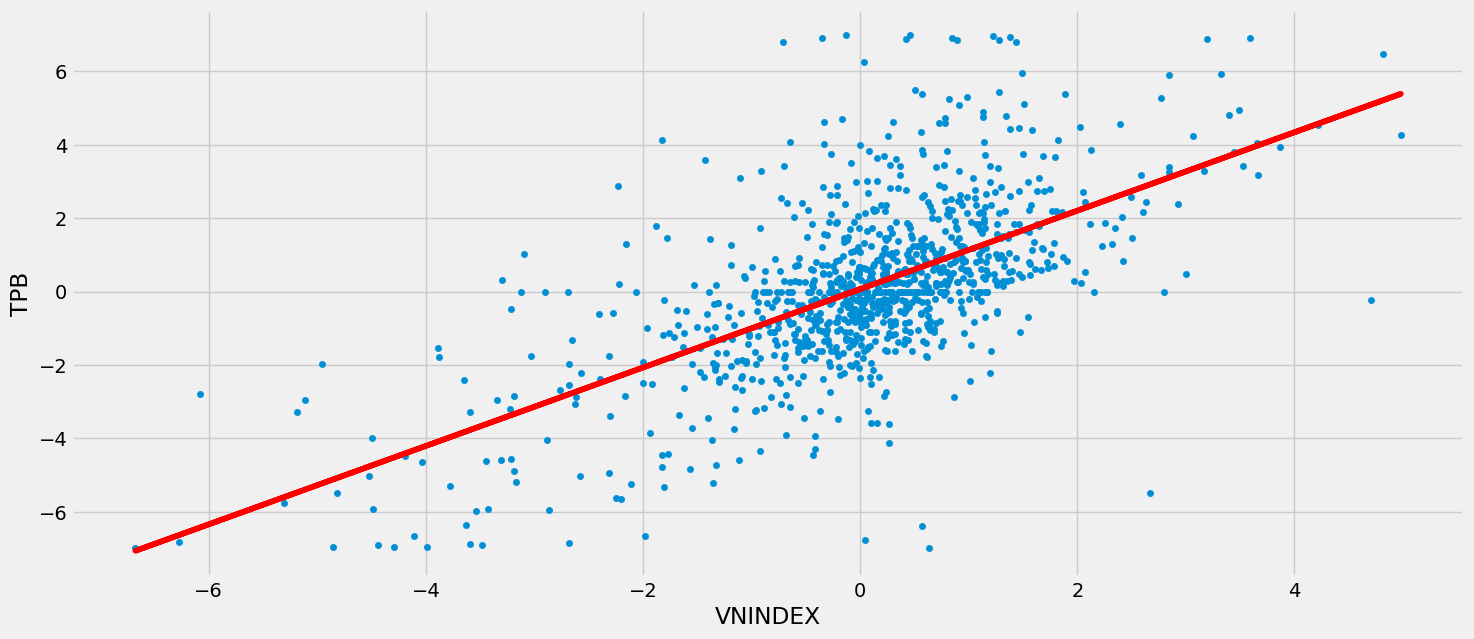

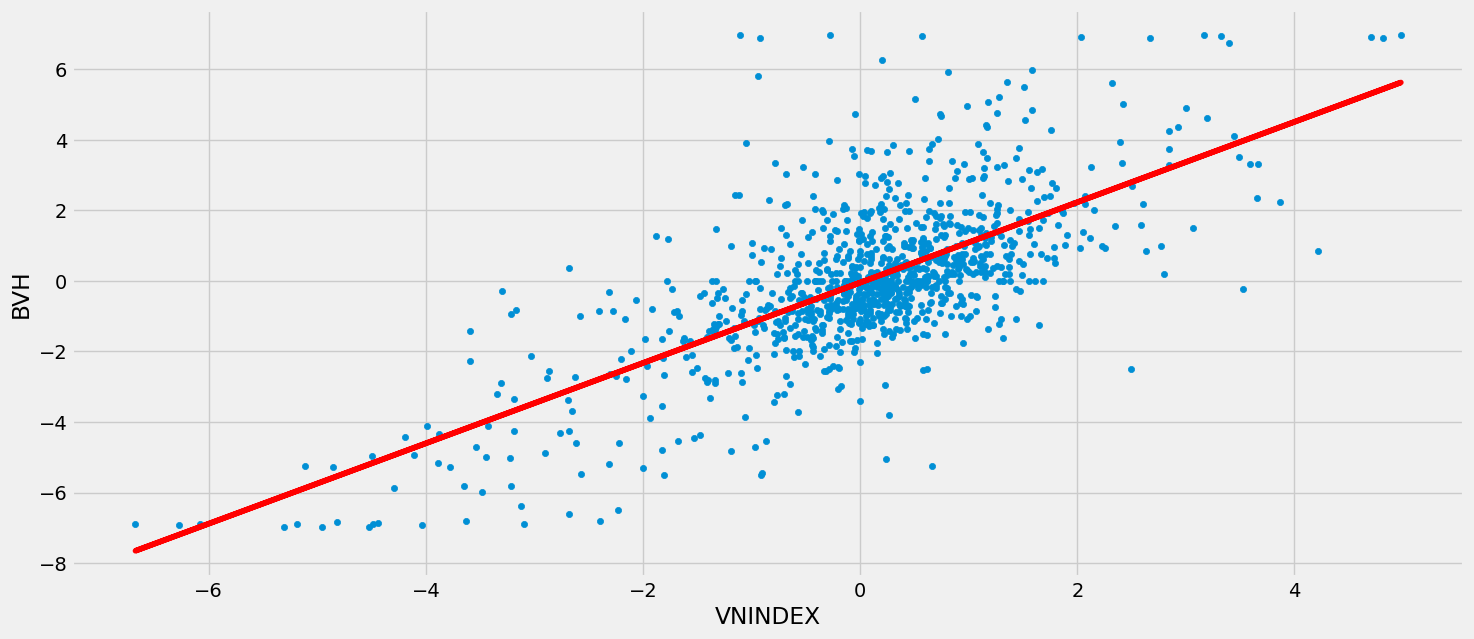

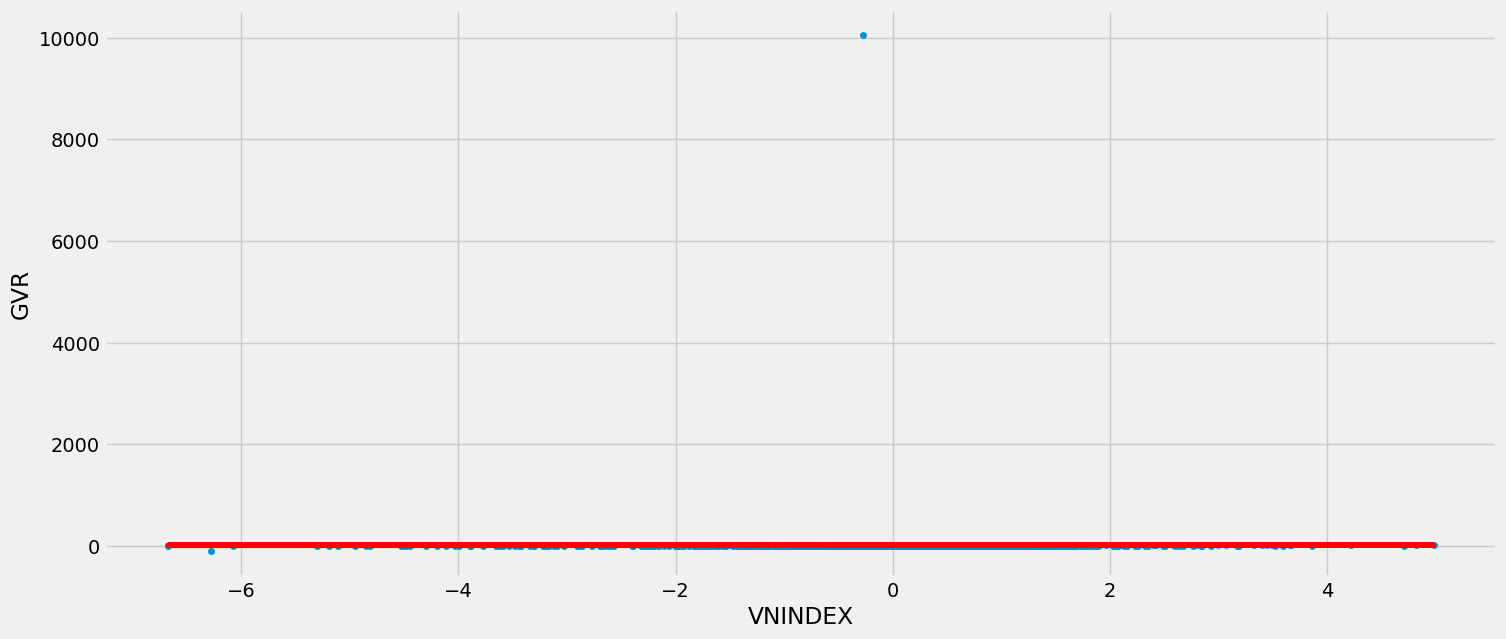

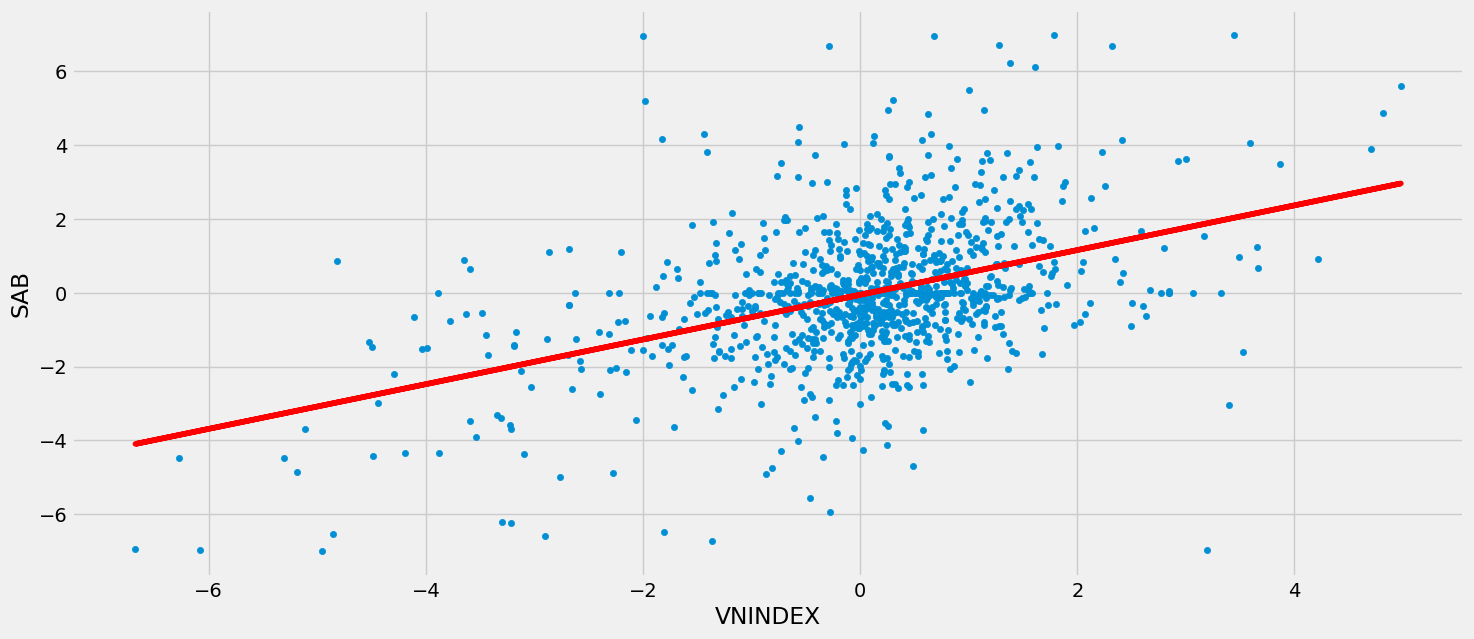

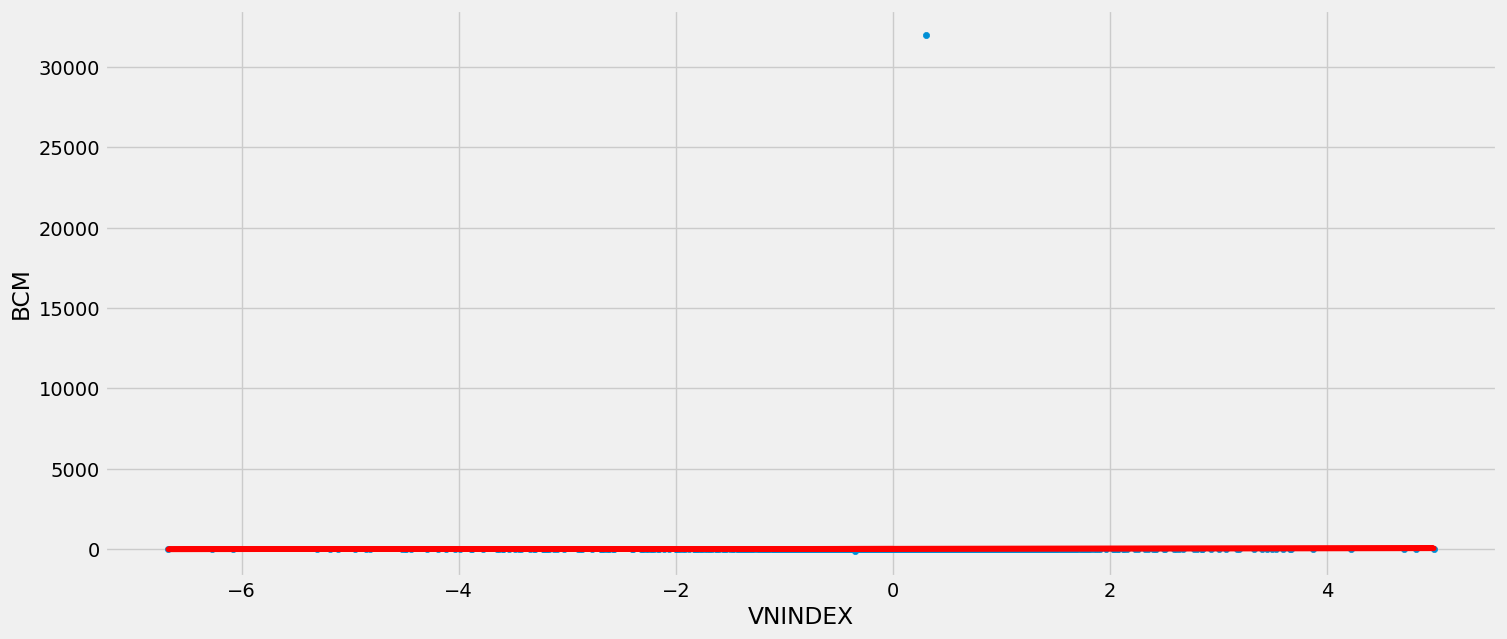

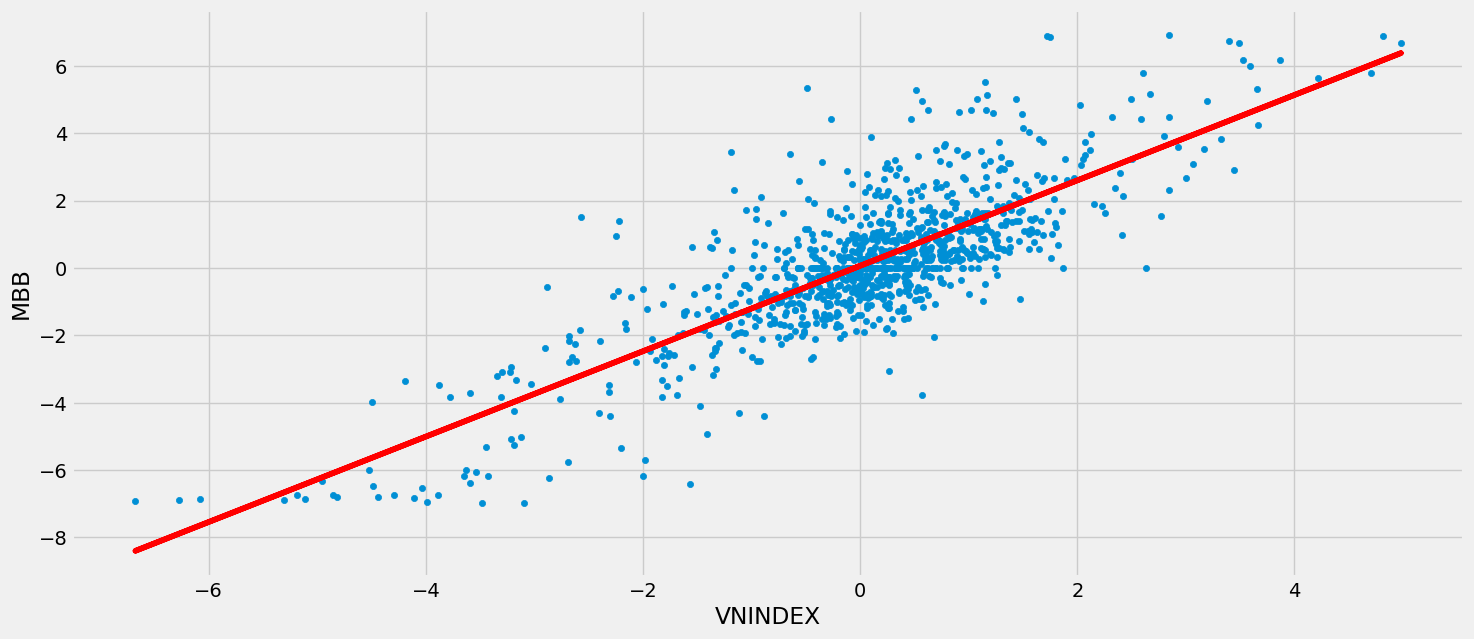

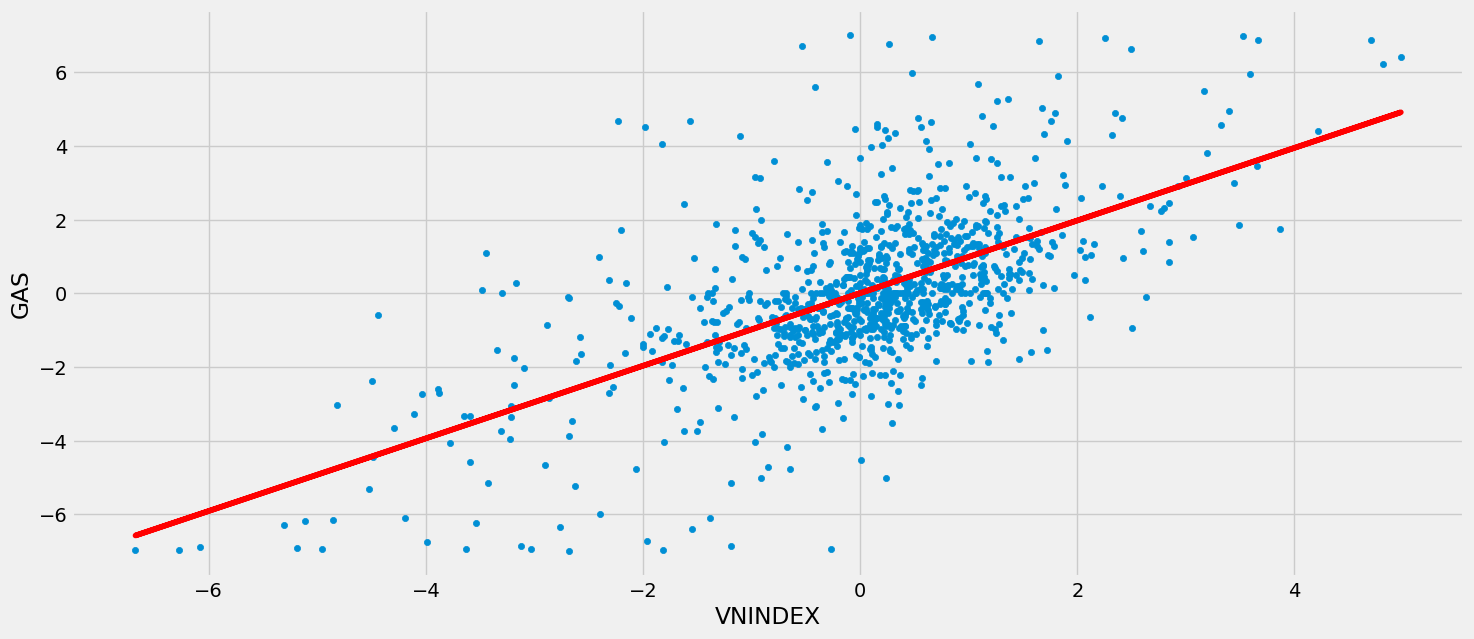

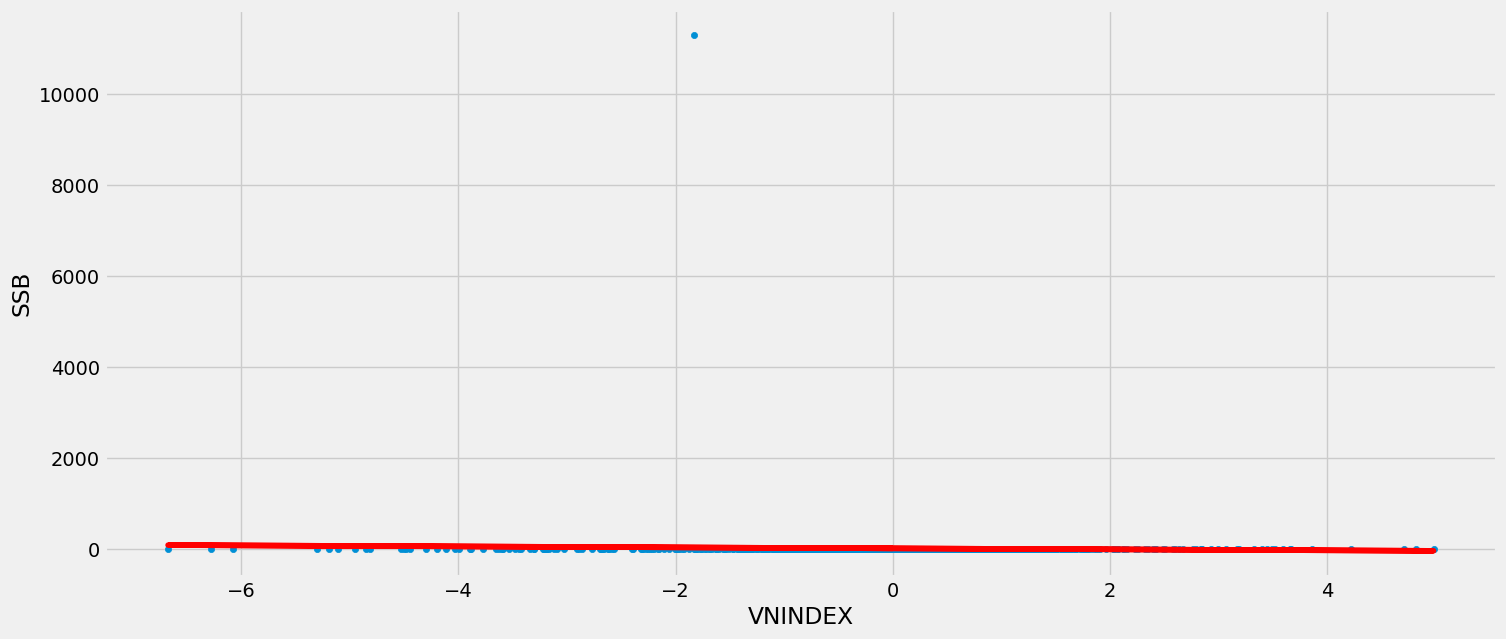

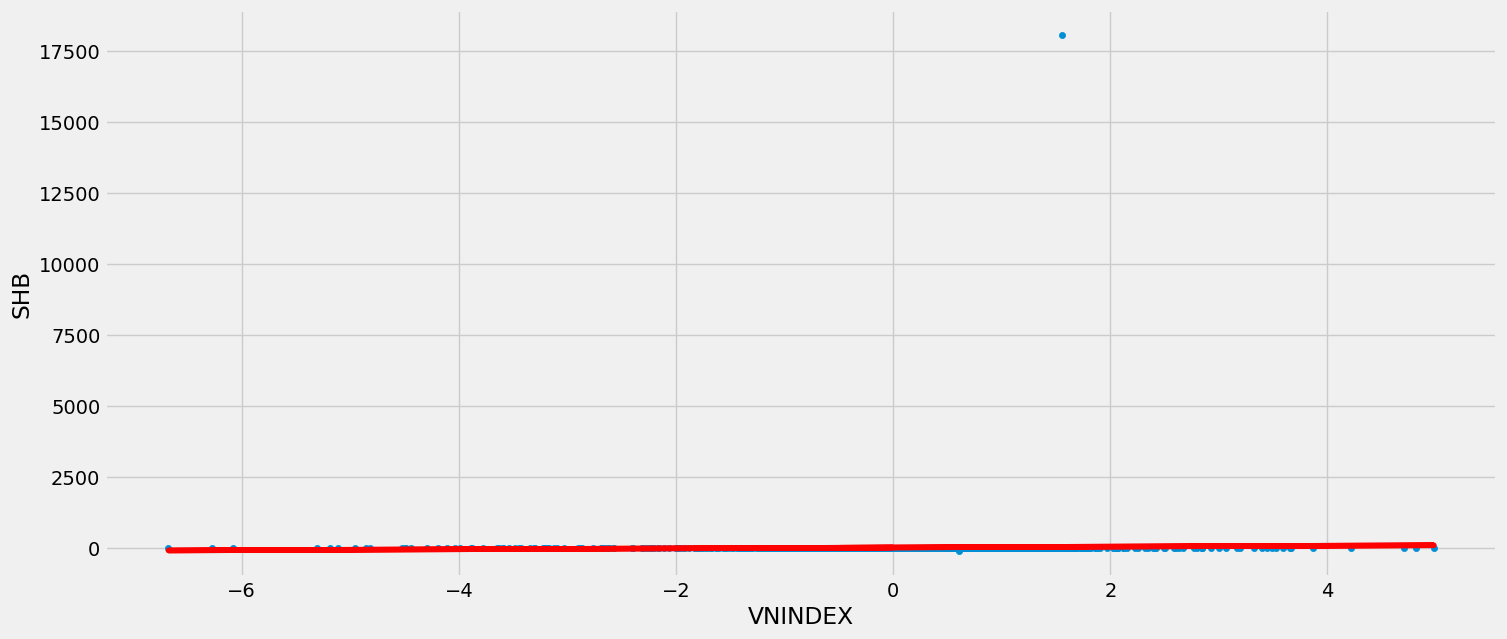

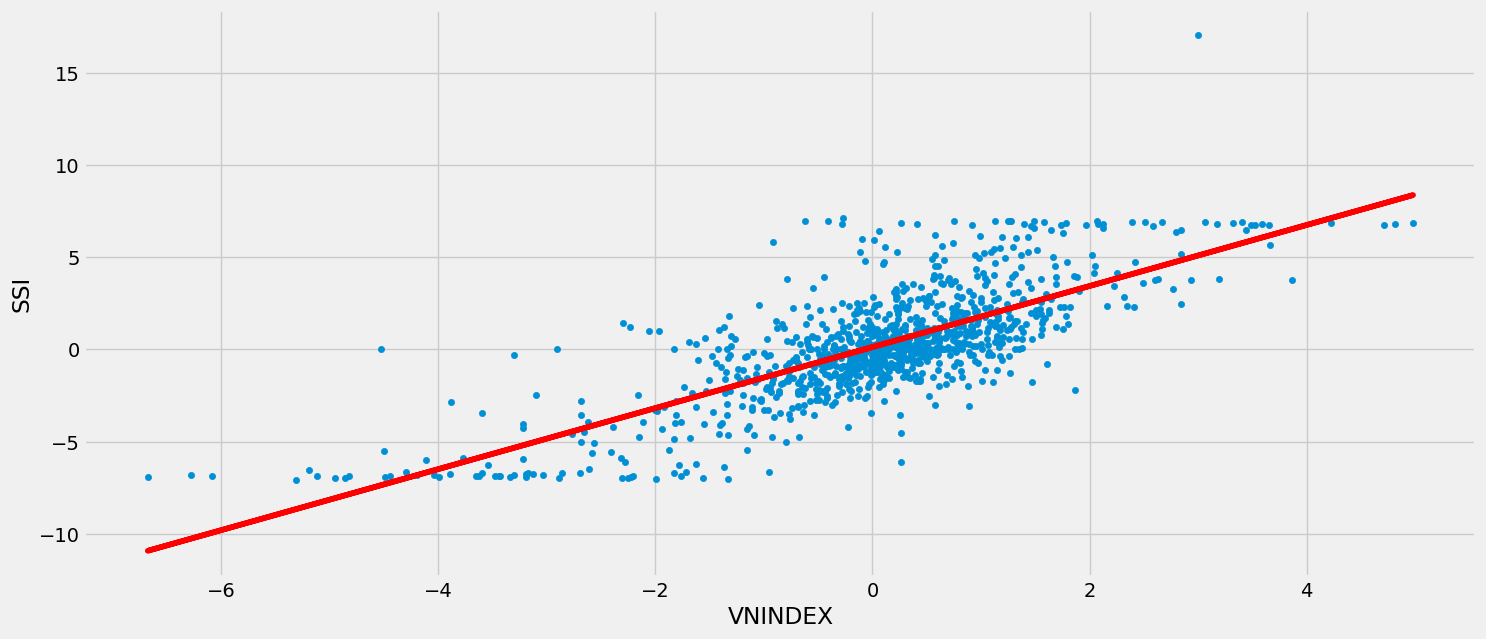

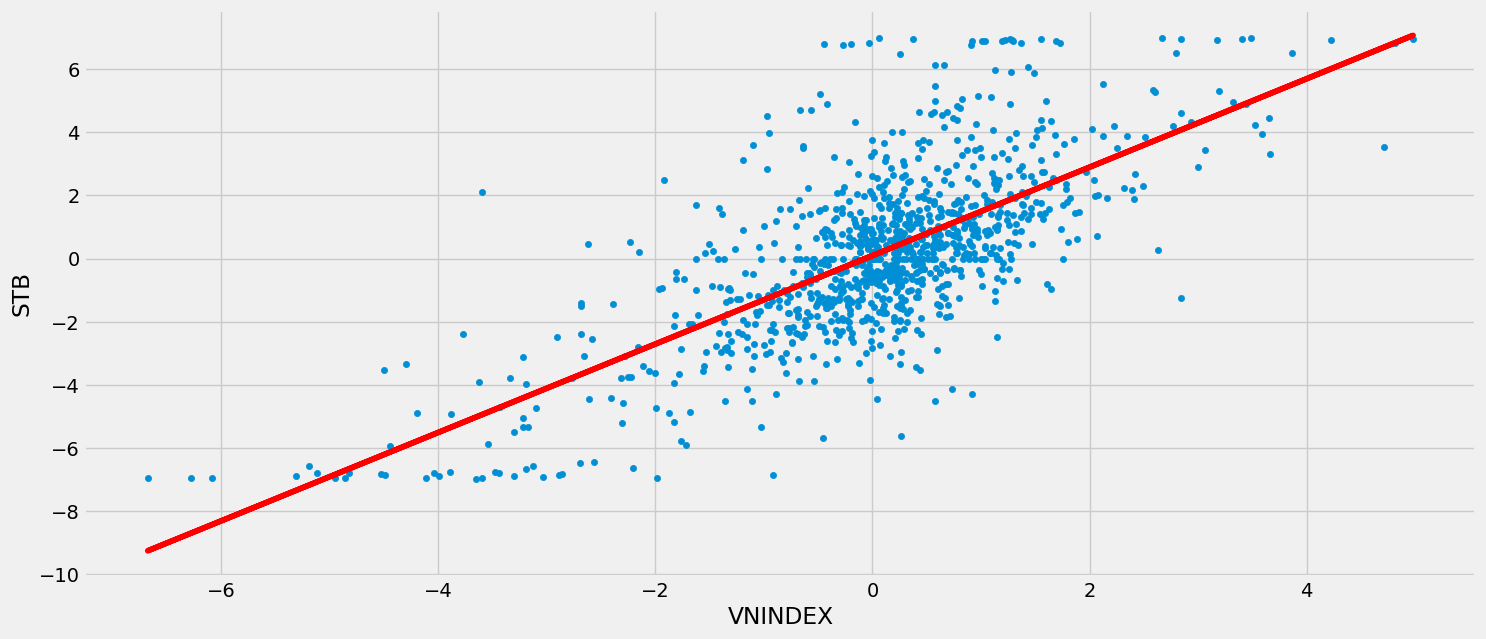

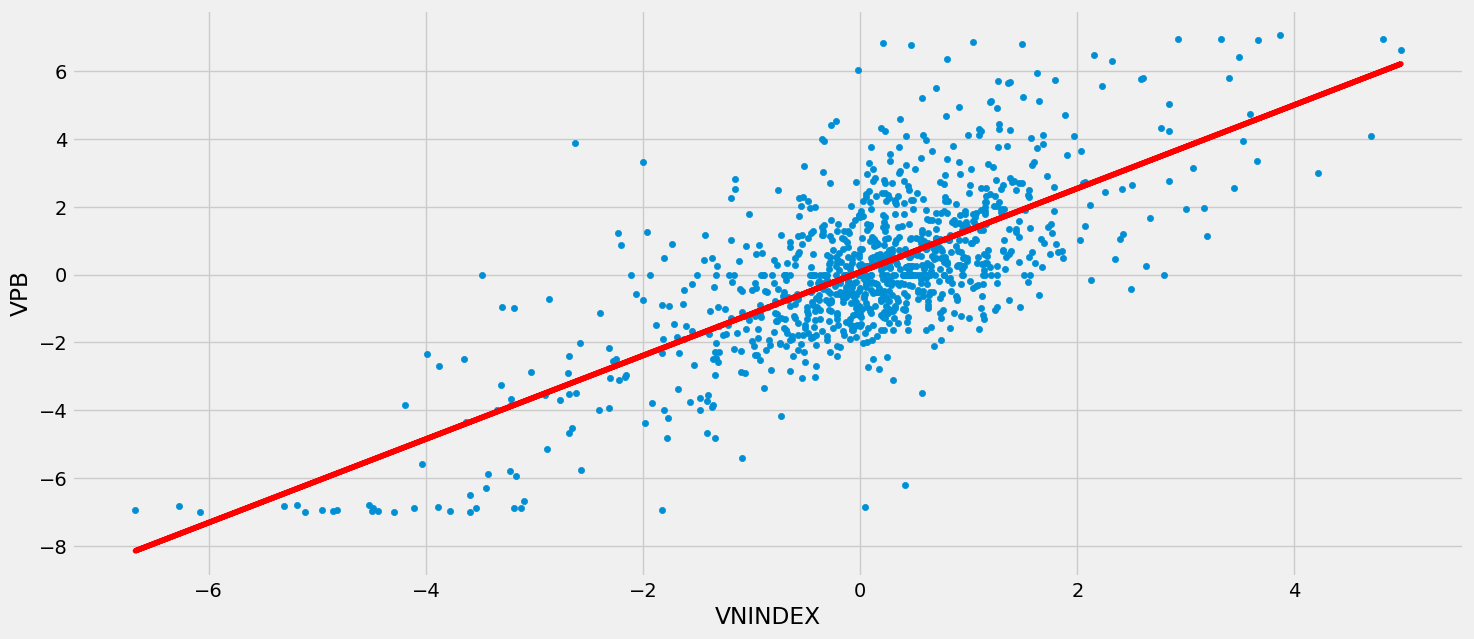

In [20]:

for i in stocks_daily_return.columns:
    if i != 'Date' and i != 'VNINDEX':
        stocks_daily_return.plot(kind = 'scatter', x = 'VNINDEX', y = i, figsize=(10, 10))
        b, a = np.polyfit(stocks_daily_return['VNINDEX'], stocks_daily_return[i], 1)
        plt.plot(stocks_daily_return['VNINDEX'], b * stocks_daily_return['VNINDEX'] + a, '-', color = 'r')
        beta[i] = b    
        alpha[i] = a  
        plt.show()